In [1]:
import numpy as np
import pandas as pd
import cv2
from random import randint
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split
# from models import build_model
from skimage.transform import resize
from helpers import get_tfrecords_creator, int_feature_creator


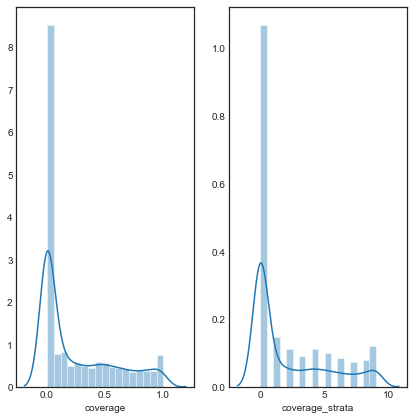

In [2]:
images_salt_stratas = pd.read_csv('./stratas_data.csv')

f, ax = plt.subplots(1,2, figsize=(7,7))
sns.distplot(images_salt_stratas['coverage'], ax=ax[0])
sns.distplot(images_salt_stratas['coverage_strata'], ax=ax[1])


In [3]:
images_salt_stratas.head()

,Unnamed: 0,id,mask,img,coverage,coverage_strata
0,0,000e218f21,./tgs/train/masks/000e218f21.png,./tgs/train/images/000e218f21.png,0.000000,0
1,1,003c477d7c,./tgs/train/masks/003c477d7c.png,./tgs/train/images/003c477d7c.png,0.032938,0
2,2,00441f1cf2,./tgs/train/masks/00441f1cf2.png,./tgs/train/images/00441f1cf2.png,0.000000,0
3,3,0050766ae2,./tgs/train/masks/0050766ae2.png,./tgs/train/images/0050766ae2.png,0.000000,0
4,4,005b452274,./tgs/train/masks/005b452274.png,./tgs/train/images/005b452274.png,0.000000,0


In [4]:
train_index, valid_index = train_test_split(images_salt_stratas.index, test_size=0.2, stratify=images_salt_stratas.coverage_strata, random_state=1337)

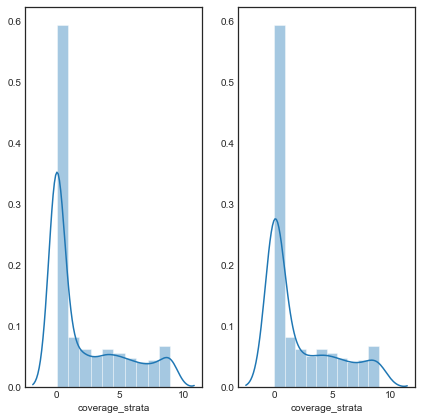

In [5]:
f, ax = plt.subplots(1, 2, figsize=(7,7))
sns.distplot(images_salt_stratas.loc[train_index].coverage_strata, ax=ax[0], label='train_stratas', bins=10)
sns.distplot(images_salt_stratas.loc[valid_index].coverage_strata, ax=ax[1], label='valid_strataas', bins=10)

In [6]:
train_imgs, valid_imgs = train_test_split([(i, m) for i, m in zip(images_salt_stratas['img'].values, images_salt_stratas['mask'].values)], test_size=0.2, stratify=images_salt_stratas.coverage_strata, random_state=1337)

In [7]:
create_tfrecords = get_tfrecords_creator(feature_creator=int_feature_creator)

In [8]:
    create_tfrecords(train_imgs, './tfrecords/tfrecords101_int/train')
    create_tfrecords(valid_imgs, './tfrecords/tfrecords101_int/validation')

In [8]:
img = cv2.imread('./tgs/train/images/000e218f21.png', cv2.IMREAD_GRAYSCALE)

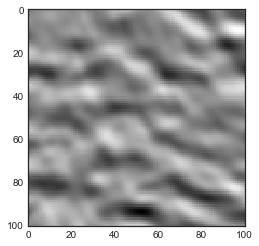

In [11]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [13]:
img2 = np.pad(img, ((13, 14), (13, 14)), 'symmetric')

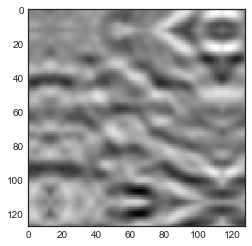

In [14]:
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

In [15]:
img2.shape

(128, 128)